# Final Project, Data Mining
[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction) research

## Load open source libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from pandas.tools.plotting import radviz
%matplotlib inline

## Define useful functions

In [3]:
def get_column_info(df,column):
    # print general info about column
    print df[column].describe()
    
    # show histogram amd box plot
    plt.figure()
    df[df.TARGET==0][column].plot(kind="hist", label="satisfied customers")
    df[df.TARGET==1][column].plot(kind="hist", label="unsatisfied customers")
    plt.legend();
    
    plt.figure()
    df[df.TARGET==0][column].plot(kind="kde", label="satisfied customers")
    df[df.TARGET==1][column].plot(kind="kde", label="unsatisfied customers")
    plt.legend();
    
    plt.figure()
    df[column].plot(kind='box')

## Load datasets

In [4]:
df_train = pd.read_csv("data/clean_train.csv")
df_train.shape

(76020, 308)

In [5]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [6]:
df_test = pd.read_csv("data/clean_test.csv")
df_test.shape

(75818, 307)

In [7]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40532.10
1,5,2,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45486.72
2,6,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46993.95
3,7,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,187898.61
4,9,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73649.73


## Explore correlations

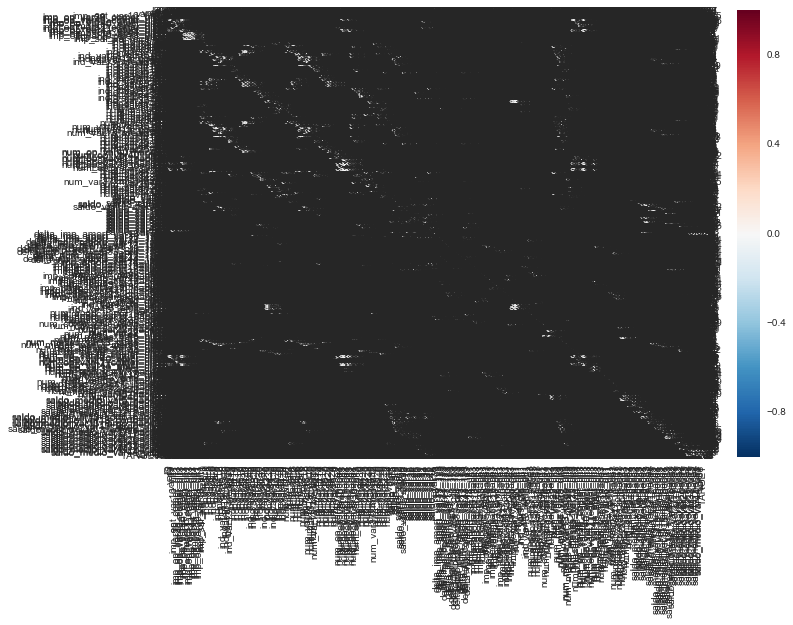

In [24]:
# column correlations
correlations = df_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, linewidths=1.5)

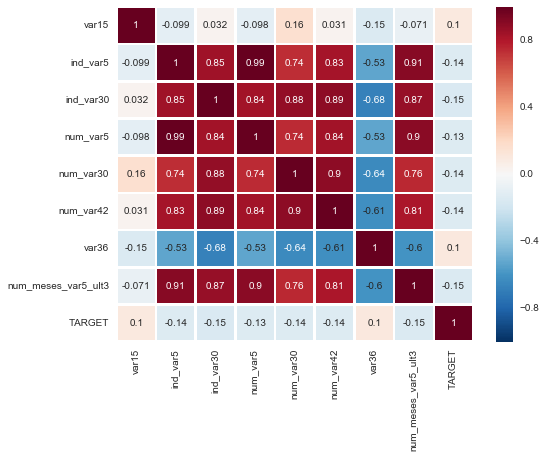

In [27]:
# get list of columns correlated with TARGET
X = df_train.columns[df_train.iloc[:,:307].corrwith(df_train.TARGET).abs()>0.1].tolist()
y = ["TARGET"]
corr_data = df_train[X].join(df_train[y])
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, linewidths=1.5)

## var15

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64


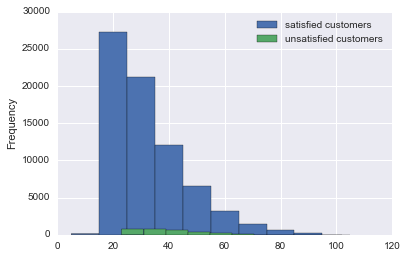

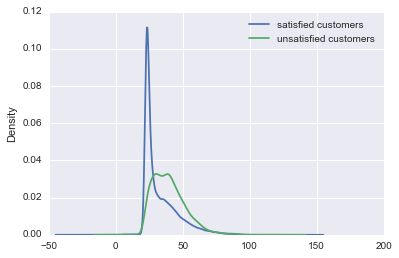

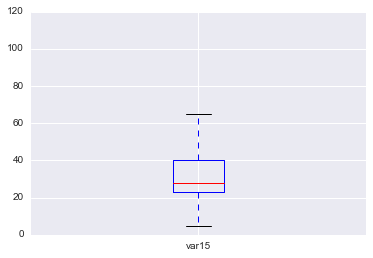

In [36]:
get_column_info(df_train,"var15")

## ind_var5

count    76020.000000
mean         0.663760
std          0.472425
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ind_var5, dtype: float64


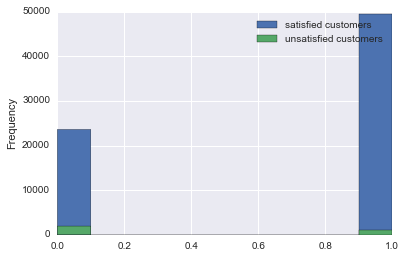

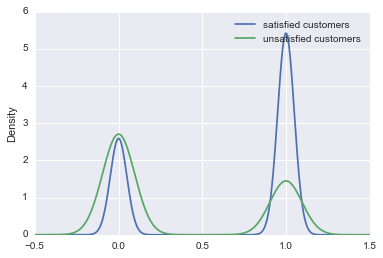

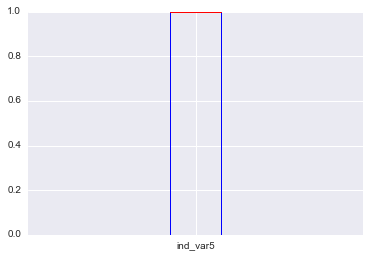

In [40]:
get_column_info(df_train,"ind_var5")

## ind_var30

count    76020.000000
mean         0.732833
std          0.442483
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ind_var30, dtype: float64


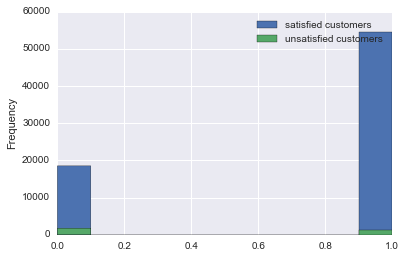

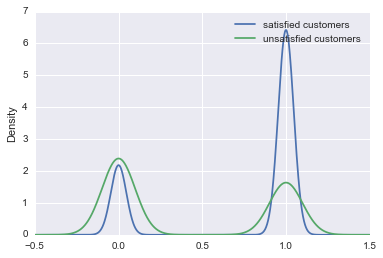

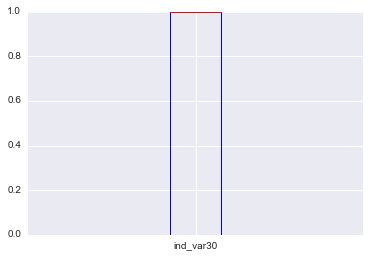

In [41]:
get_column_info(df_train,"ind_var30")

## num_var5

count    76020.000000
mean         1.999171
std          1.431902
min          0.000000
25%          0.000000
50%          3.000000
75%          3.000000
max         15.000000
Name: num_var5, dtype: float64


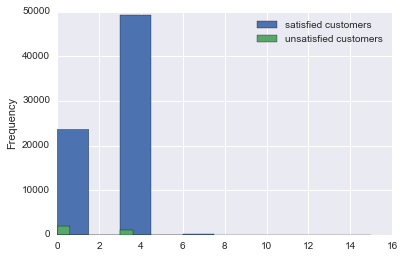

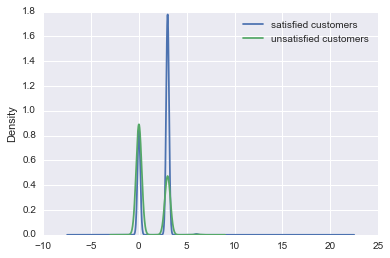

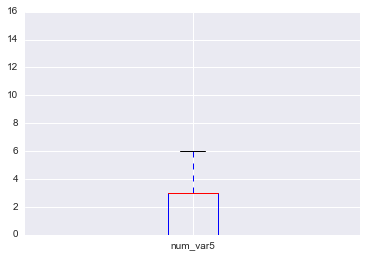

In [42]:
get_column_info(df_train,"num_var5")

## num_var30

count    76020.000000
mean         2.382873
std          1.642787
min          0.000000
25%          0.000000
50%          3.000000
75%          3.000000
max         33.000000
Name: num_var30, dtype: float64


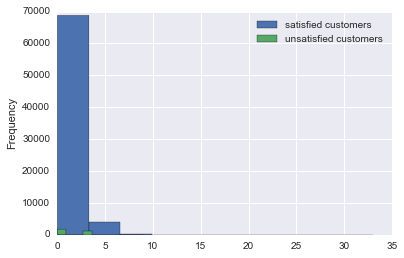

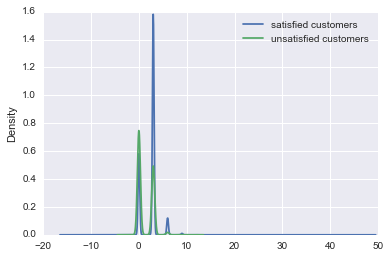

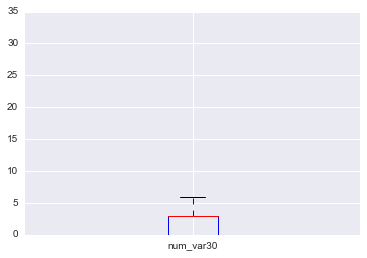

In [43]:
get_column_info(df_train,"num_var30")

## num_var42

count    76020.000000
mean         2.217995
std          1.497703
min          0.000000
25%          0.000000
50%          3.000000
75%          3.000000
max         18.000000
Name: num_var42, dtype: float64


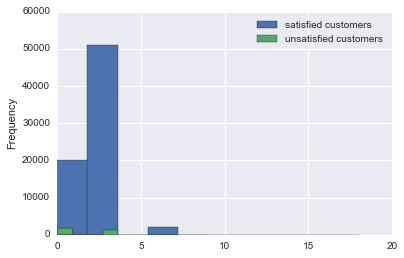

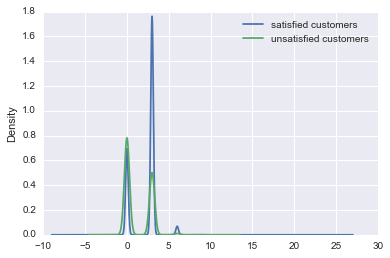

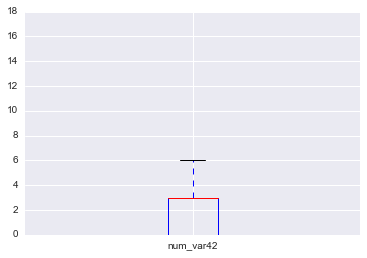

In [44]:
get_column_info(df_train,"num_var42")

## var36

count    76020.000000
mean        40.449079
std         47.362719
min          0.000000
25%          2.000000
50%          3.000000
75%         99.000000
max         99.000000
Name: var36, dtype: float64


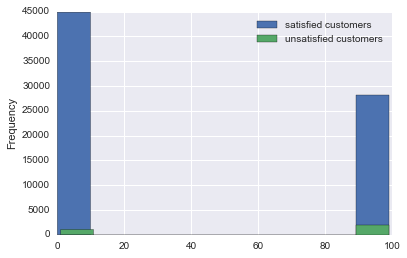

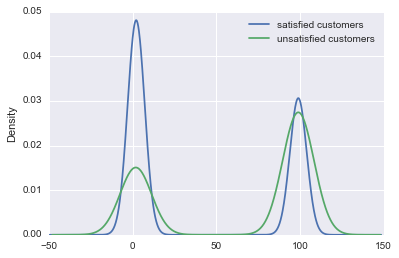

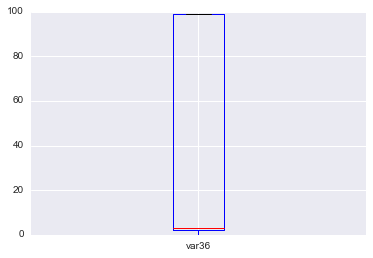

In [45]:
get_column_info(df_train,"var36")

In [48]:
df_train.var36.value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

According to density chart above customers with values of 0,1,2 or 3 in var36 are less unhappy than those who has 99.

## num_meses_var5_ult3

count    76020.000000
mean         1.979979
std          1.298924
min          0.000000
25%          0.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: num_meses_var5_ult3, dtype: float64


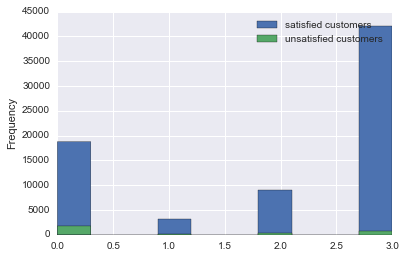

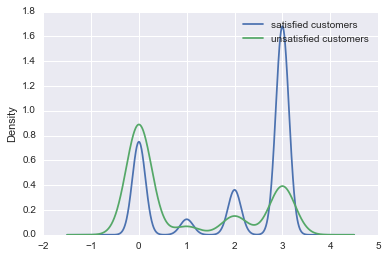

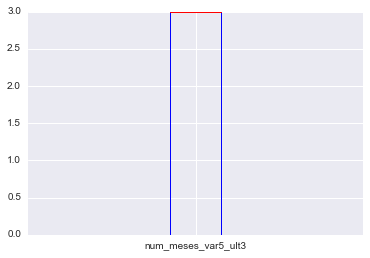

In [46]:
get_column_info(df_train,"num_meses_var5_ult3")

## var38

I suppose that var38 is customer's account balance. And I would like to see if there is relationship between customer's satisfaction and account balance.

count       76020.000000
mean       117235.809430
std        182664.598503
min          5163.750000
25%         67870.612500
50%        106409.160000
75%        118756.252500
max      22034738.760000
Name: var38, dtype: float64


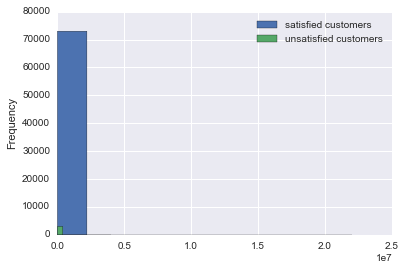

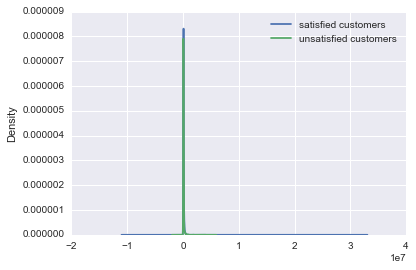

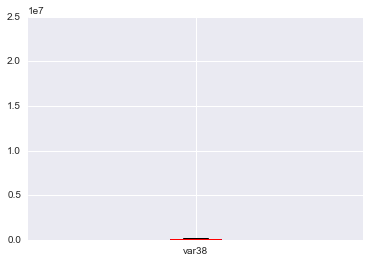

In [47]:
get_column_info(df_train,"var38")

There is huge difference between 3rd quartile and max value. I am going to use Tukey Method (interquartile range) to filter very large and very small numbers in var38.
<br>Low outliers = Q1 - 1.5(Q3 - Q1) 
<br>High outliers = Q3 + 1.5(Q3 - Q1)

In [550]:
Q1 = df_train.var38.quantile(.25)
Q3 = df_train.var38.quantile(.75)
low_limit = Q1 - 1.5*(Q3 - Q1)  
# It is -8457.8475. As far as it is negative, I am going to set low limit to 0
low_limit = 0
high_limit = Q3 + 1.5*(Q3 - Q1)
print "Low limit for outliers: ", low_limit
print "High limit for outliers: ", high_limit

var38_outliers = df_train[(df_train.var38>high_limit) | (df_train.var38<low_limit)]['ID'].count()
var38_1 = df_train[(df_train.var38>high_limit) & (df_train.TARGET==1)]['ID'].count()
print "The amount of an unsatisfied customers that have outliers in var38 is", var38_1, "out of", var38_outliers

Low limit for outliers:  0
High limit for outliers:  195084.7125
The amount of an unsatisfied customers that have outliers in var38 is 148 out of 6530


In [551]:
# I decided to remove rows with outliers in var38 to see the more clear 
# picture of var38 column 
df_clean_var38 = df_train[(df_train.var38<high_limit) & (df_train.var38>low_limit)]
print "Shape of dataset: ", df_clean_var38.shape

Shape of dataset:  (69490, 371)


Let's take a look on our "balance" data after correction.

count     69490.000000
mean      95496.241818
std       37065.177911
min        5163.750000
25%       65072.670000
50%       98034.765000
75%      117310.979016
max      195065.250000
Name: var38, dtype: float64
Satisfied customers: 66630
Unsatisfied customers: 2860


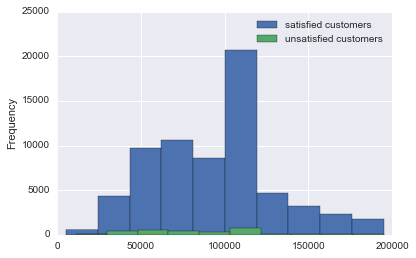

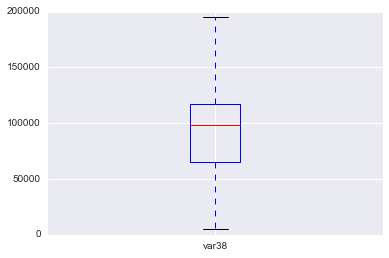

In [552]:
get_column_info(df_clean_var38,"var38")
get_target_stats(df_clean_var38)

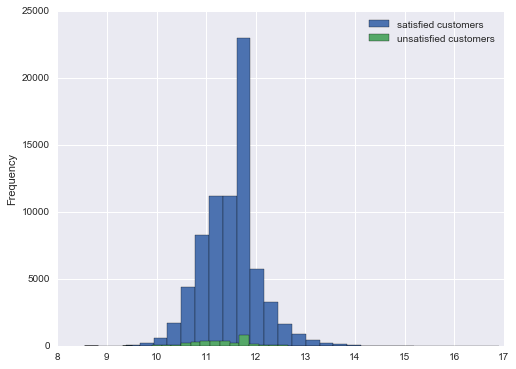

In [8]:
# improve the plot by making the x axis logarithmic
df_log = df_train
df_log["log_var38"] = df_log.var38.map(np.log)

plt.figure(figsize=(8, 6))
df_log[df_log.TARGET==0]["log_var38"].plot(kind="hist", bins=30, label="satisfied customers")
df_log[df_log.TARGET==1]["log_var38"].plot(kind="hist", bins=30, label="unsatisfied customers")
plt.legend();

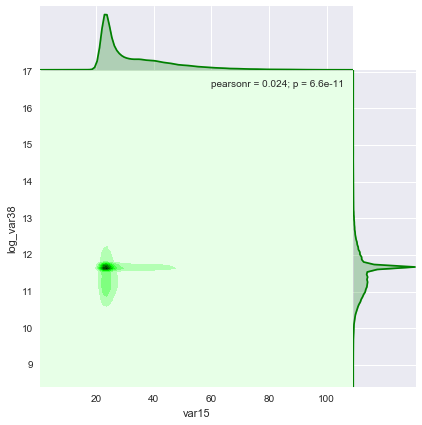

In [23]:
sns.jointplot('var15', 'log_var38', data=df_log, kind="kde", space=0, color="g")

## Explore all correlated columns together

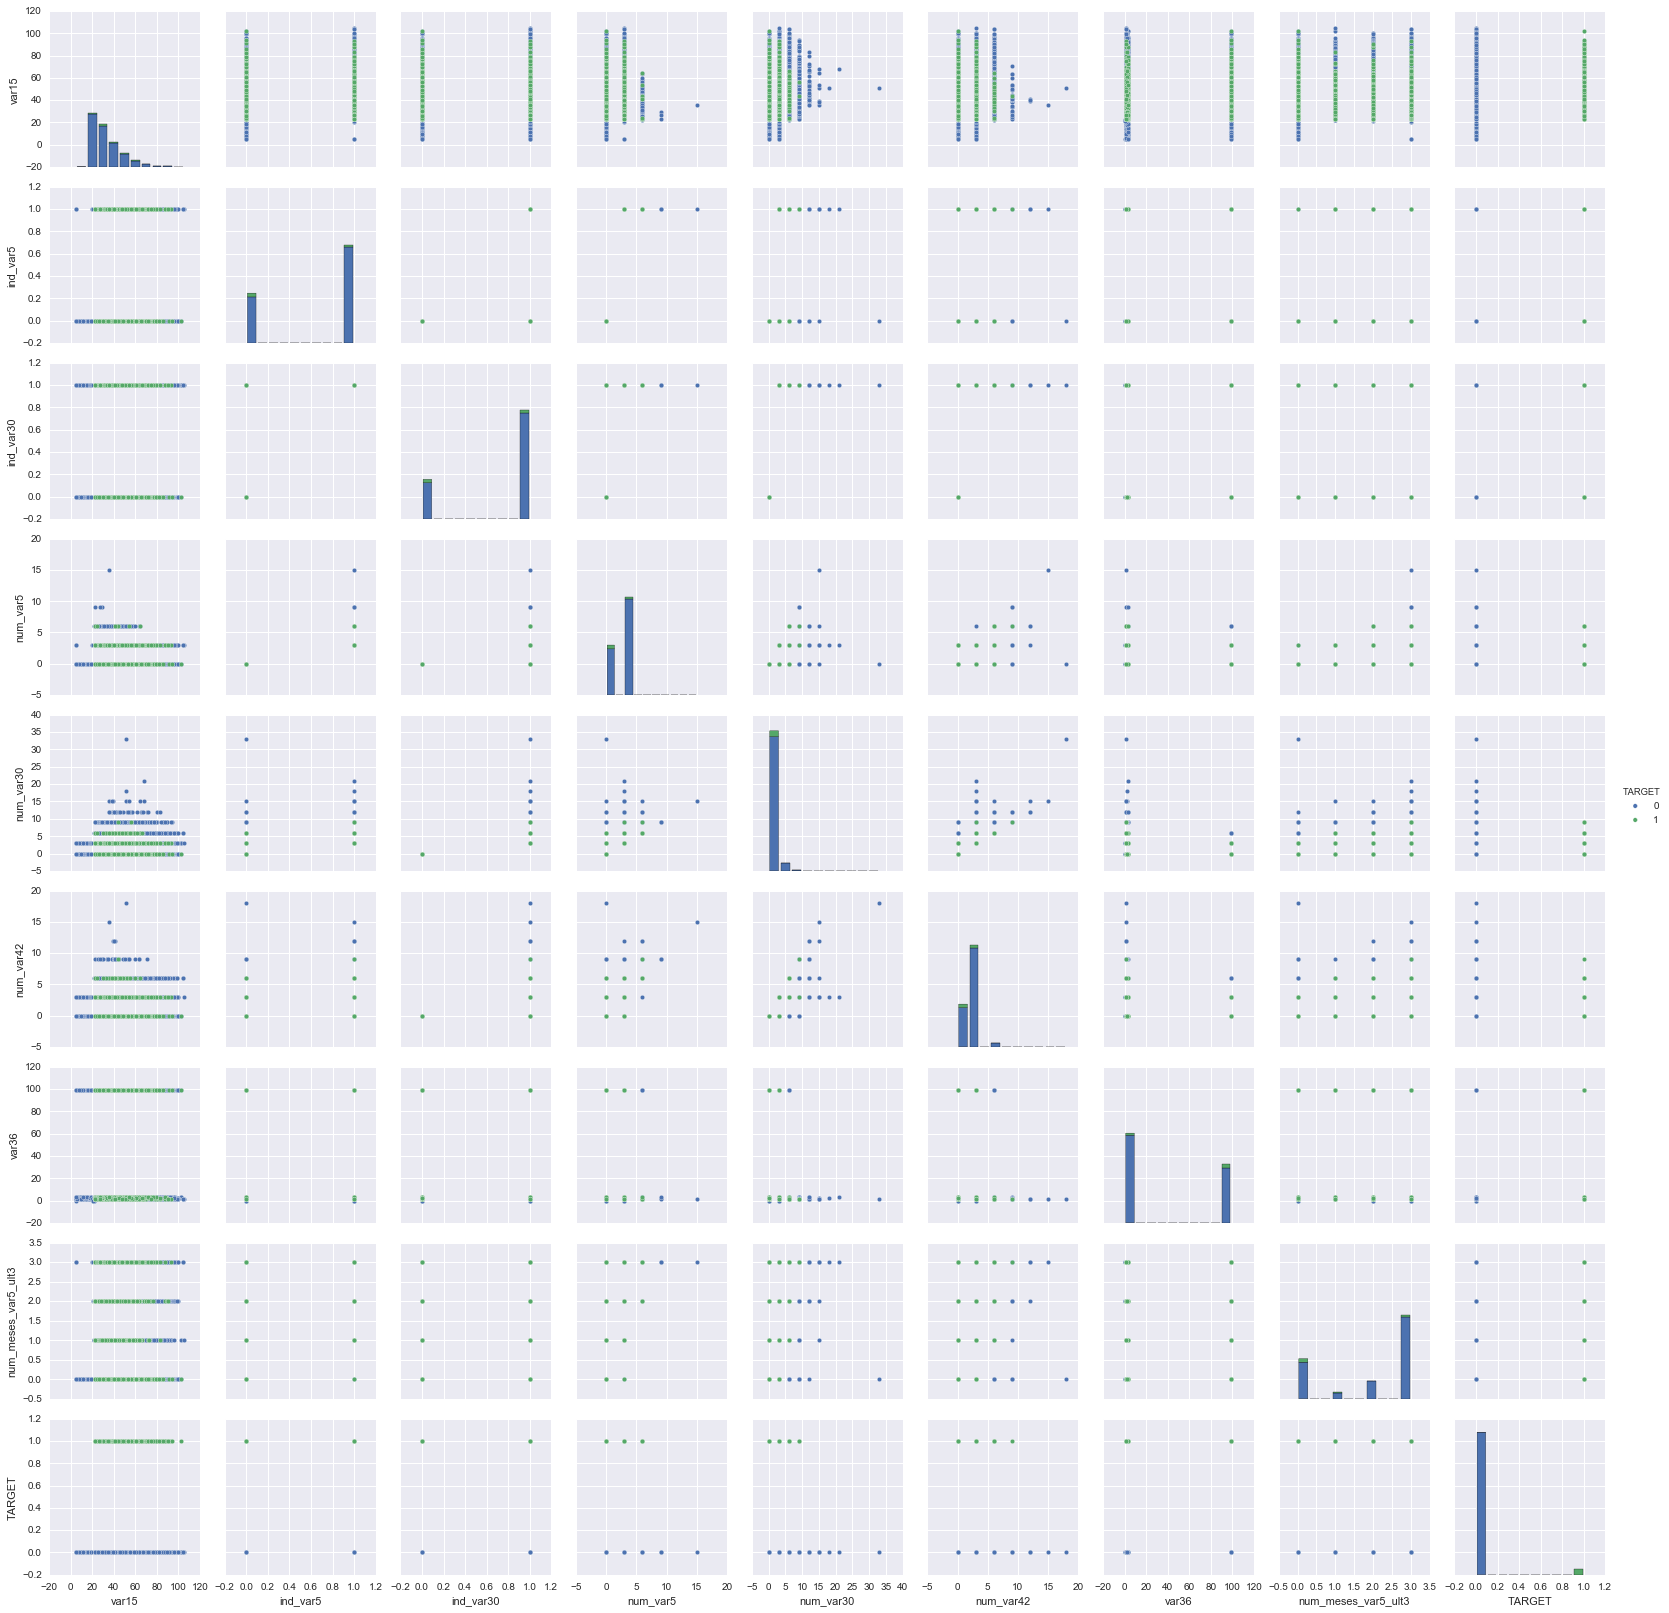

In [570]:
sns.pairplot(corr_data, hue="TARGET")

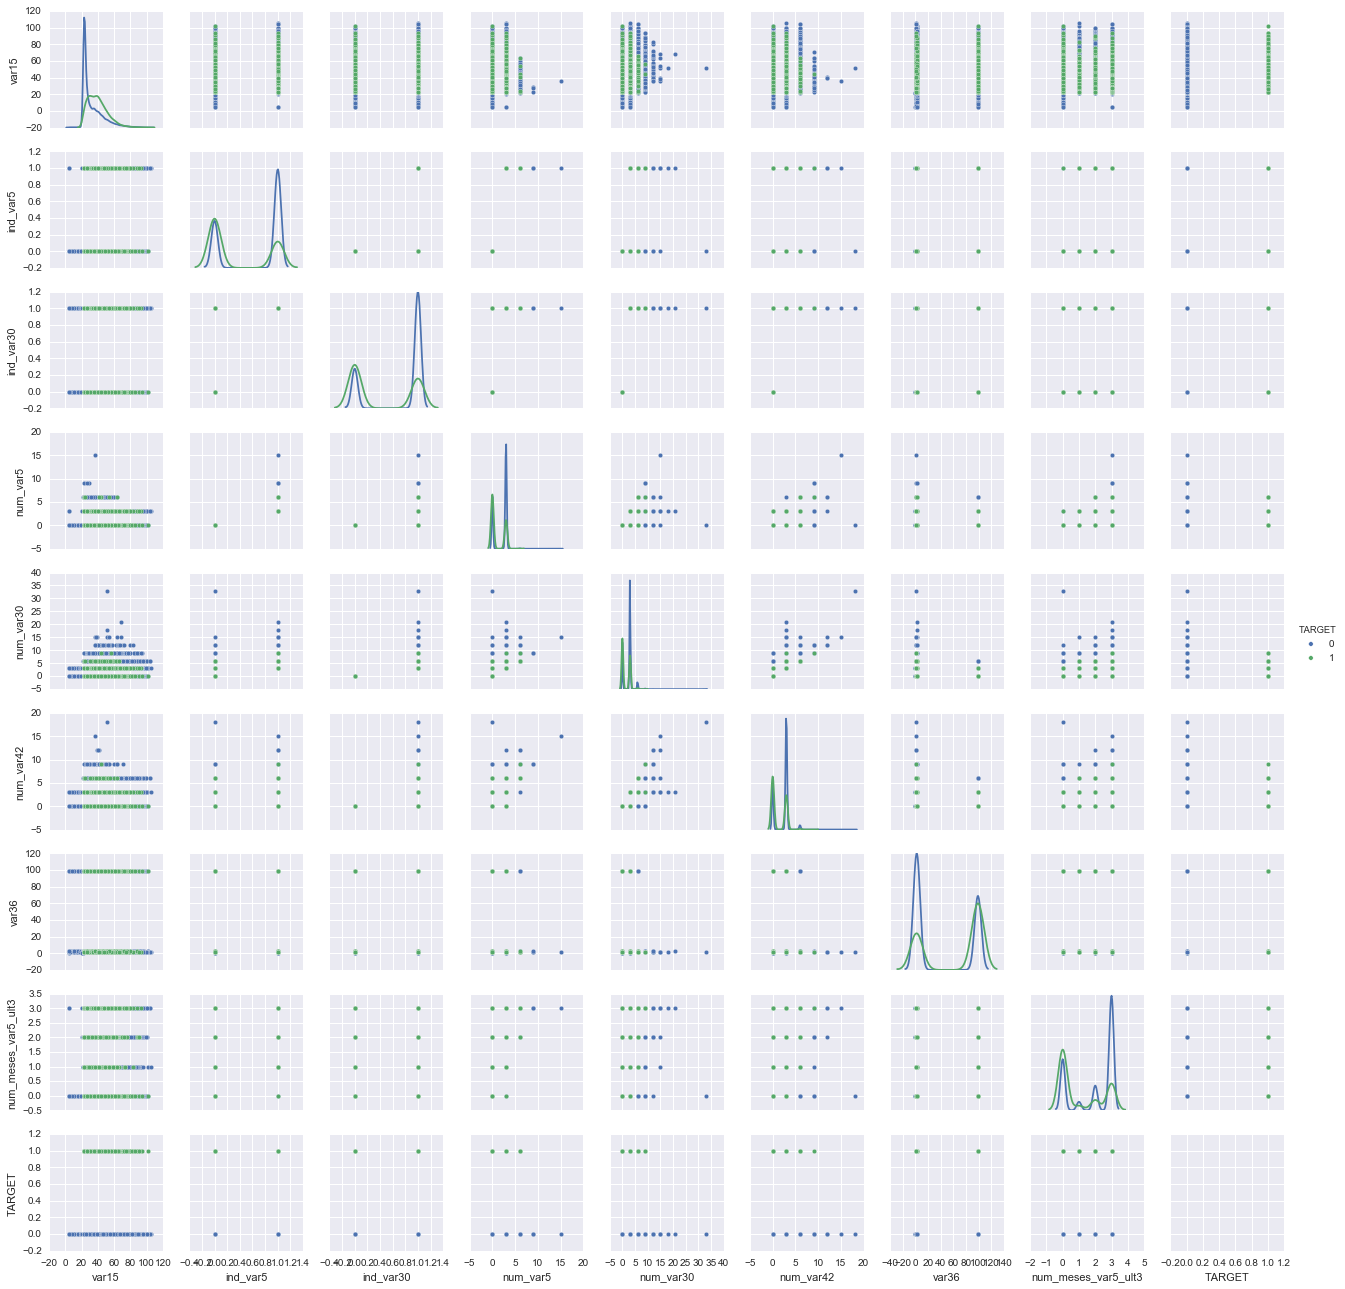

In [57]:
sns.pairplot(corr_data, hue="TARGET", size=2, diag_kind="kde");

## RadViz vizualization

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

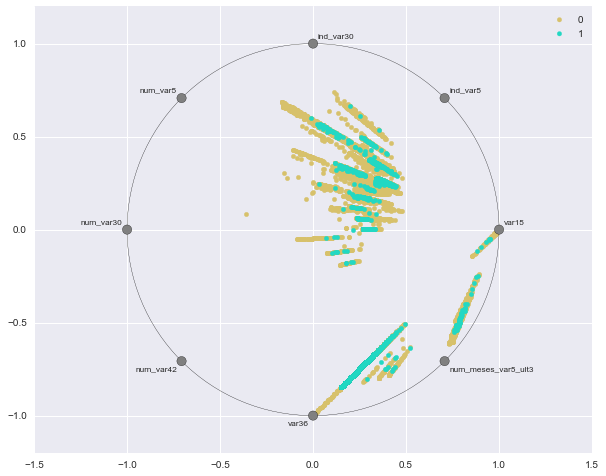

In [55]:
plt.figure(figsize=(10, 8))
radviz(corr_data, "TARGET");